[Random variables](https://en.wikipedia.org/wiki/Random_variable) and [probability distributions](https://en.wikipedia.org/wiki/Probability_distribution) together provide a way of classifying probability spaces. One reason this classification is useful for our purposes is that it makes it straightforward to decompose probability spaces with complex event spaces–e.g. event spaces on strings or grammatical derivations–into a collection of simpler probability spaces.

When actually working with random variables and probability distributions, the line between the two is often blurred. This fact is particularly apparent when we consider how popular libraries like [`scipy`](https://scipy.org/) (and its dependents) model the two. For this reason, I'm going to walk through some technicalities before showing any code.

## Random variables

We tend to think of random variables as fundamentally indeterminate in nature. We model this indeterminacy using a function. Specifically, we use a [measurable function](https://en.wikipedia.org/wiki/Measurable_function) $X: \Omega \rightarrow A$, where $\langle \Omega, \mathcal{F} \rangle$ and $\langle A, \mathcal{G} \rangle$ are both measurable spaces, which just means that $\Omega$ and $A$ are sets associated with $\sigma$-algebras $\mathcal{F}$ and $\mathcal{G}$, respectively. Given $\sigma$-algebras $\mathcal{F}$ and $\mathcal{G}$, this function must satisfy the constraint that:

$$\{X^{-1}(E) \mid E \in \mathcal{G}\} \subseteq \mathcal{F}$$

That is, every event $E$ in the codomain space $\mathcal{G} \subseteq 2^A$ must have a corresponding event $X^{-1}(E)$ as its pre-image in the domain space $\mathcal{F} \subseteq 2^\Omega$.

I'm using $\langle \Omega, \mathcal{F} \rangle$ for the domain space to signal that the domain of a random variable is always the sample and event space of some probability space, which means that there will always be some probability space $\langle \Omega, \mathcal{F}, \mathbb{P} \rangle$ implicit in a random variable $X$.

For our purposes, the codomain $A$ of $X$ will almost always be the real numbers $\mathbb{R}$ and $\mathcal{G}$ will be almost always be the [Borel $\sigma$-algebra](https://en.wikipedia.org/wiki/Borel_set) on $\mathbb{R}$. As I mentioned above, knowing the fine details of what a Borel $\sigma$-algebra is is not going to be necessary: all you really need to know is that it's got every real interval, so $E \in \mathcal{G}$ will always be an interval (and crucially, not just a single real number). 

To ground this out, we can consider our running example of English pronouns again, where $\Omega = \left\{\text{I}, \text{me}, \text{you}_\text{[+acc]}, \text{you}_\text{[-acc]}, \text{they}, \text{them}, \text{it}_\text{[+acc]}, \text{it}_\text{[-acc]} \text{she}, \text{her}, \text{he}, \text{him}, \text{we}, \text{us}\right\}$. 

In [1]:
pronouns = frozenset({
    "I", "me", 
    "you_nonacc", "you_acc", 
    "they", "them", 
    "it_nonacc", "it_acc", 
    "she", "her", 
    "he", "him", 
    "we", "us",
})

So $X(\omega)$, where $\omega$ is some pronoun, will be a real number. It's important to note that $X$ is being applied directly to a pronoun (rather than a set of pronouns in the event space) and resulting in a single real number (rather than an interval in the Borel $\sigma$-algebra on the reals). I'm pointing this out because of the way we defined a random variable: in terms of the pre-image $X^{-1}(E)$ of $E$ under $X$ (relativized to $\sigma$-algebras $\mathcal{F}$ and $\mathcal{G}$). $X^{-1}(E)$ is a pre-image, not the value of an inverse, which will be important when we discuss discrete v. continuous random variables.  

If we were to assume that the event space for our pronouns is the [discrete event space](index.ipynb#considerations-around-defining-event-spaces) $2^\Omega$, one possible (arbitrarily ordered) random variable is:

$$V = \begin{bmatrix} \text{I} \rightarrow 1 \\ \text{me} \rightarrow 2 \\ \text{you}_\text{[+acc]} \rightarrow 3 \\ \text{you}_\text{[-acc]} \rightarrow 4 \\ \text{they} \rightarrow 5 \\ \text{them} \rightarrow 6 \\ \text{it}_\text{[+acc]} \rightarrow 7 \\ \text{it}_\text{[-acc]} \rightarrow 8 \\ \text{she} \rightarrow 9 \\ \text{her} \rightarrow 10 \\ \text{he} \rightarrow 11 \\ \text{him} \rightarrow 12 \\ \text{we} \rightarrow 13 \\ \text{us} \rightarrow 14 \\ \end{bmatrix}$$

So then, for example, $V^{-1}((-\infty, 4)) = \left\{\text{I}, \text{me}, \text{you}_\text{[+acc]}\right\}$, $V^{-1}((1, 5)) = \left\{\text{me}, \text{you}_\text{[+acc]}, \text{you}_\text{[-acc]}\right\}$, and $V^{-1}((11, \infty)) = V^{-1}((-\infty, 1)) = V^{-1}((1, 2)) = \emptyset$, all of which are in $\mathcal{F} = 2^\Omega$.

### Discrete v. continuous random variables

An important distinction among random variables is whether they are *discrete* or *continuous*. 

#### Discrete random variables

A discrete random variable is one whose range $X(\Omega)$—i.e. the image of its domain—is [countable](https://en.wikipedia.org/wiki/Countable_set). The random variable given above is thus countable, since $V(\Omega) = \{1, ..., 14\}$ is finite and therefore countable. 

A discrete random variable need not be finite. For instance, we often want to work with sample spaces consisting of all strings $\Sigma^*$ of primitive elements $\Sigma$–e.g. phonemes, morphemes, etc.–in a language. In this case, we might be concerned with modeling the length of a string, and so wemight define a random variable $L: \Sigma^* \rightarrow \mathbb{R}$ that maps a string $\omega \in \Sigma^*$ to its length $L(\omega)$. Unlike $V$, $L$ has an infinite but countable range (assuming lengths are isomorphic with the natural numbers); and unlike $V$, $L$ is not [injective](https://en.wikipedia.org/wiki/Injective_function): if $L(\omega_1) = L(\omega_2)$, it is *not* guaranteed that $\omega_1 = \omega_2$, since many strings share a length with other strings.

#### Continuous random variables

A continuous random variable is a random variable whose range is uncountable. One example of a continuous random variable (mentioned earlier) is one where $\Omega$ is the set of all pairs of first and second formant values. In this case, we'll assume that $\Omega$ is just all pairs of positive real numbers $\mathbb{R}_+^2$.^[The event space for $\Omega = \mathbb{R}_+^2$ is analogous to the Borel $\sigma$-algebra for $\mathbb{R}$. Basically, it contains all pairs of real intervals. The technical details aren't really going to be important for our purposes beyond knowing that $\mathbb{R}_+^2$ is going to act like $\mathbb{R}$ in the ways we care about.]

If we assume that the random variable $F: \mathbb{R}_+^2 \rightarrow \mathbb{R}^2$ is the identity function $F(\mathbf{x}) = \mathbf{x}$, we get that $F$ is a continuous random variable, since $\mathbb{R}$ is uncountable and $F^{-1}(E) = E \in \mathcal{F}$.

## Probability distributions

A probability distribution is a compact description of a probability space $\langle \Omega, \mathcal{F}, \mathbb{P} \rangle$ in conjunction with a random variable whose domain is $\Omega$ (relative to $\mathcal{F}$). 

### Discrete probability distributions

In the case of a discrete random variable $X$ (e.g. our pronoun and string-length examples), we can fully describe its probability distribution using a [probability mass function](https://en.wikipedia.org/wiki/Probability_mass_function) (PMF) $p_X: \text{cod}(X) \rightarrow \mathbb{R}_+$.This function is defined directly in terms of the random variable and the probability function $\mathbb{P}$: 

$$p_X(x) \equiv \mathbb{P}(\{\omega \in \Omega \mid X(\omega) = x\})$$

These definitions are related to a notation that you might be familiar with: $\mathbb{P}(X = x) \equiv p_X(x)$. This notation is often extended to other relations $\mathbb{P}(X \in E) = \mathbb{P}(\{\omega \in \Omega \mid \omega \in X^{-1}(E)\})$ or $\mathbb{P}(X \leq x) \equiv \mathbb{P}(\{\omega: X(\omega) \leq x\})$.

The latter of these is often used in defining the [cumulative distribution function](https://en.wikipedia.org/wiki/Cumulative_distribution_function) (CDF) $F_X: \text{cod}(X) \rightarrow \mathbb{R}_+$:

$$F_X(x) = \mathbb{P}(X \leq x) = \sum_{y \in X(\Omega):y<x} p_X(y)$$ 

The PMF (and by extension the CDF) is *parameterized* in terms of the information necessary to define their outputs for all possible inputs $x \in X(\Omega)$. This parameterization allows us to talk about *families of distributions*, which all share a functional form (modulo the values of the parameters). We'll see a few examples of this below.  

In `scipy`, discrete distributions are implemented using [`scipy.rv_discrete`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_discrete.html), either by direct instantiation or subclassing.

In [2]:
from scipy.stats import rv_discrete

#### Finite distributions

When there are a finite number of values that the random variables can take, as in the example of $V$ above, the probability of each possibility can simply be listed. One such distribution—or really family of distributions—that we will make extensive use of—indeed, the distribution that our pronoun random variable $V$ from above has—is the [categorical distribution](https://en.wikipedia.org/wiki/Categorical_distribution).^[It is common to talk about *the* categorical distribution, when we really mean *the family of* categorical distributions.]  This distribution is parameterized by a list of probabilities $\boldsymbol\theta$, where $\theta_i$ gives $p_V(i) = \mathbb{P}(V = i) = \mathbb{P}(\{\omega \in \Omega \mid V(\omega) = i\}) = \theta_i$ and $\sum_{i \in V(\Omega)} \theta_i$.^[The parameterization below is derived from the relative frequencies for each pronoun extracted from the [Universal Dependencies English Web TreeBank](https://universaldependencies.org/treebanks/en_ewt/index.html) [here](statistical-inference.ipynb).] 

In [76]:
from numpy import arange

idx = arange(14)
theta = (0.03, 0.09, 0.03, 0.12, 0.07, 0.28, 0.07, 0.05, 0.02, 0.02, 0.07, 0.08, 0.05, 0.02)
categorical = rv_discrete(name='categorical', values=(idx, theta))

The PMF is implemented as an instance method [`rv_discrete.pmf`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_discrete.pmf.html#scipy.stats.rv_discrete.pmf) on this distribution.

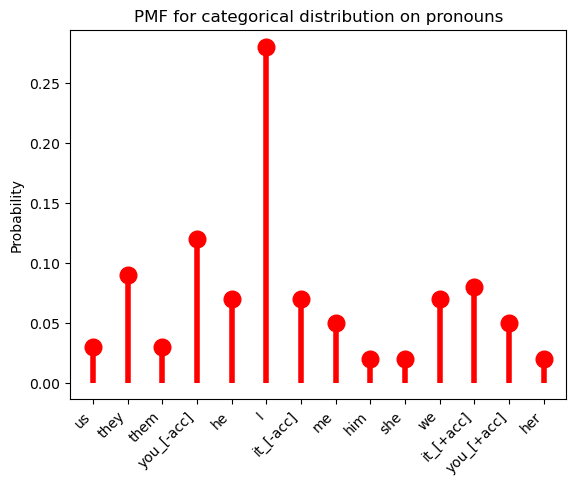

In [93]:
#| code-fold: true

import warnings
from matplotlib.pyplot import subplot

warnings.filterwarnings('ignore')

pronouns_ordered = [
    'us', 'they', 'them', r'you_[-acc]',
    'he', 'I', r'it_[-acc]', 'me', 'him', 'she',
    'we', r'it_[+acc]', r'you_[+acc]', 'her'
]

ax = subplot()
ax.plot(pronouns_ordered, categorical.pmf(idx), 'ro', ms=12, mec='r')
ax.vlines(pronouns_ordered, 0, categorical.pmf(idx), colors='r', lw=4)
ax.set_xticklabels(pronouns_ordered, rotation=45, ha='right')
ax.set_ylabel("Probability")
_ = ax.set_title("PMF for categorical distribution on pronouns")

The [Bernoulli distribution](https://en.wikipedia.org/wiki/Bernoulli_distribution), which we will also make extensive use of, is a special case of the categorical distribution where $|X(\Omega)| = 2$.

In [5]:
from scipy.stats import bernoulli

By convention, $X(\Omega) = \{0, 1\}$. In this case, we need to specify the probability $\pi$ for only one value of $X$, since the probability of the other must be $1- \pi$. Indeed, more generally, we need to specify only $|X(\Omega)| - 1$ values for a random variable $X$ that is distributed categorical.

Importantly, note that the condition that $|X(\Omega)| = 2$ is a condition on the range of $X$, not on $\Omega$. So it may be that $|\Omega| > 2$. Indeed, we would want this in the case where we had an event space like $\mathcal{F}_\text{case}$, where $\mathcal{F}_\text{case} = \{F_\text{[+acc]}, F_\text{[-acc]}, \Omega, \emptyset\}$, with $F_\text{[+acc]} = \{\text{me}, \text{you}_\text{[+acc]}, \text{them}, \text{her}, \text{him}, \text{it}_\text{[+acc]}, \text{us}\}$ and $F_\text{[-acc]} = \Omega - F_\text{[+acc]}$. 

We then might say that:

$$X(\omega) = \begin{cases}
1 & \text{if } \omega \in F_\text{[+acc]}\\
0 & \text{otherwise}
\end{cases}$$

That is, the function that maps a pronoun to whether it is accusative or not is a Bernoulli random variable.

In [87]:
bern = bernoulli(0.27)

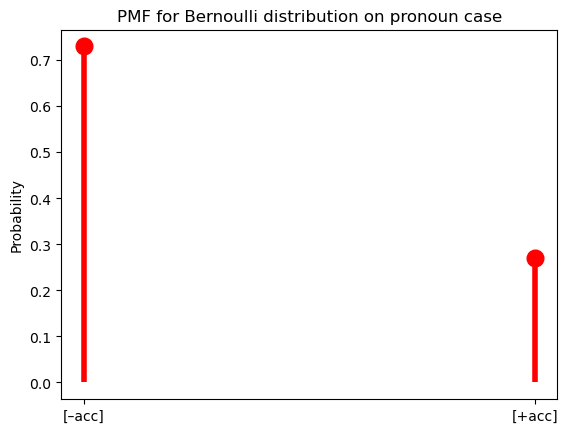

In [88]:
#| code-fold: true

ax = subplot()
ax.plot(["[–acc]", "[+acc]"], bern.pmf([0, 1]), 'ro', ms=12, mec='r')
ax.vlines(["[–acc]", "[+acc]"], 0, bern.pmf([0, 1]), colors='r', lw=4)
ax.set_ylabel("Probability")
_ = ax.set_title("PMF for Bernoulli distribution on pronoun case")

::: {.callout-caution}
## Question

Suppose we did not include the case specifications on *you* and *it* in $\Omega$, instead defining $\mathcal{F}_\text{case}$ as we did [here](index.ipynb#the-case-event-space): $\mathcal{F}_\text{case} = \{F_\text{[+acc]}, F_\text{[-acc]}, F_\text{[+acc]} \cap F_\text{[-acc]}, \Omega - F_\text{[+acc]}, \Omega - F_\text{[-acc]}, \Omega - [F_\text{[+acc]} \cap F_\text{[-acc]}], \Omega, \emptyset\}$, with $F_\text{[+acc]} = \{\text{me}, \text{you}, \text{them}, \text{her}, \text{him}, \text{it}, \text{us}\}$ and $F_\text{[-acc]} = \{\text{I}, \text{you}, \text{they}, \text{she}, \text{he}, \text{it}, \text{we}\}$. How would $X$ need to change?
:::

::: {.callout-tip collapse="true"}
## Answer

One option is to say:

$$X(\omega) = \begin{cases}
2 & \text{if } \omega \in F_\text{[+acc]} \land \omega \in F_\text{[-acc]}\\
1 & \text{if } \omega \in F_\text{[+acc]} \land \omega \not\in F_\text{[-acc]}\\
0 & \text{otherwise}
\end{cases}$$

Another option is to say:

$$X(\omega) = \begin{cases}
\langle 1, 1 \rangle & \text{if } \omega \in F_\text{[+acc]} \land \omega \in F_\text{[-acc]}\\
\langle 1, 0 \rangle & \text{if } \omega \in F_\text{[+acc]} \land \omega \not\in F_\text{[-acc]}\\
\langle 0, 1 \rangle & \text{otherwise}\\
\end{cases}$$

:::


I'll follow the convention of denoting the PMF of a particular kind of distribution using (usually shortened versions of) the distribution's name, with the parameters following a semicolon.^[This semicolon notation–in contrast to the pipe notation–will become important shortly.]

$$\text{Cat}(x; \boldsymbol\theta) = p_X(x) = \mathbb{P}(X = x) = \mathbb{P}(\{\omega \in \Omega \mid X(\omega) = x\}) = \theta_x$$

To express the above equivalences, I'll often write:

$$X \sim \text{Cat}(\boldsymbol{\theta})$$

This statement is read "$X$ is distributed categorical with parameters $\boldsymbol{\theta}$."

So then the Bernoulli distribution would just be:

$$\text{Bern}(x; \pi) = \begin{cases}\pi & \text{if } x = 1\\1 - \pi & \text{if } x = 0\end{cases}$$

And if a random variable $X$ is distributed Bernoulli with parameter $\pi$, we would write:

$$X \sim \text{Bern}(\pi)$$

It's sometimes useful to write the PMF for the categorical and Bernoulli distributions as:

$$\text{Cat}(x; \boldsymbol\theta) = \prod_{i \in V(\Omega)} \theta_i^{1_{\{x\}}[i]}$$

$$\text{Bern}(x; \pi) = \pi^{x}(1-\pi)^{1-x}$$

where

$$1_A[x] = \begin{cases}1 & \text{if } x \in A\\ 0 & \text{otherwise}\\ \end{cases}$$

In an abuse of notation, I will sometimes write:

$$\text{Cat}(x; \boldsymbol\theta) = \prod_{i \in V(\Omega)} \theta_i^{1_{x}[i]}$$

Categorical and Bernoulli distributions won't be the only finite distributions we work with, but they will be the most common.

#### Countably infinite distributions

When there are a countably infinite number of values that a random variable can take, as in the example of string length $L$ above, the probability of each possibility cannot simply be listed: we need some way of computing it for any value. 

However we compute these values, they must sum to one as required by the assumption of unit measure: $\mathbb{P}(\Omega) = 1$. Since $\mathbb{P}(\Omega) = \sum_{x \in X(\Omega)} p_X(x)$, another way of stating this requirement is to say that the series $\sum_{x \in X(\Omega)} p_X(x)$ must converge to 1. 

One example of such a series is a geometric series, such as $\sum_{k=1}^\infty \frac{1}{2^k} = \frac{1}{2} + \frac{1}{4} + \frac{1}{8} + \ldots = 1$. 

In [8]:
class parameterless_geometric_gen(rv_discrete):
    "A special case of the geometric distribution without parameters"
    def _pmf(self, k):
        return 2.0 ** -(k+1)

parameterless_geometric = parameterless_geometric_gen(name="parameterless_geometric")

This series gives us our first example of a probability distribution with *infinite support*–i.e. one that assigns a non-zero probability to an infinite (but countable) number of values of a random variable. So for instance, if we are considering our random variable $L$ mapping strings to their lengths, $p_X(k) = \frac{1}{2^k}$ is a possible PMF for $L$.^[This assumes that strings cannot have zero length, meaning that $\Omega = \Sigma^+$ rather than $\Sigma^*$; if we want to allow zero-length strings $\epsilon$, we would need $p_X(k) = \frac{1}{2^{k+1}}$.]

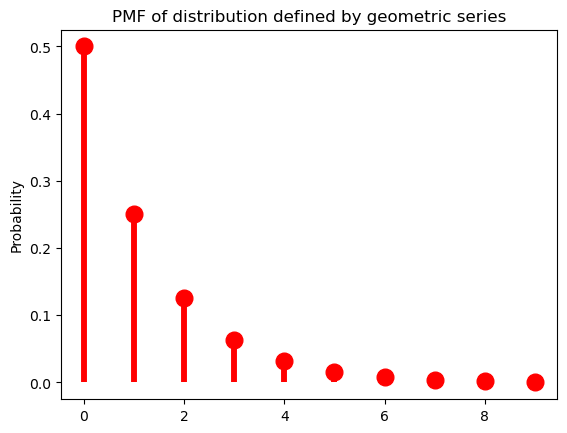

In [9]:
#| code-fold: true

k = arange(10)

ax = subplot()
ax.plot(k, parameterless_geometric.pmf(k), 'ro', ms=12, mec='r')
ax.vlines(k, 0, parameterless_geometric.pmf(k), colors='r', lw=4)
ax.vlines(k, 0, parameterless_geometric.pmf(k), colors='r', lw=4)
ax.set_ylabel("Probability")
_ = ax.set_title("PMF of distribution defined by geometric series")

As it stands, this distribution has no parameters, meaning that we have no control over how quickly the probabilities drop off. The geometric distribution provides us this control using a parameter to $\pi \in (0, 1]$:

$$\text{Geom}(k; \pi) = (1-\pi)^k\pi$$

In [10]:
from scipy.stats import geom

When $\pi = \frac{1}{2}$, we get exactly the distribution above.

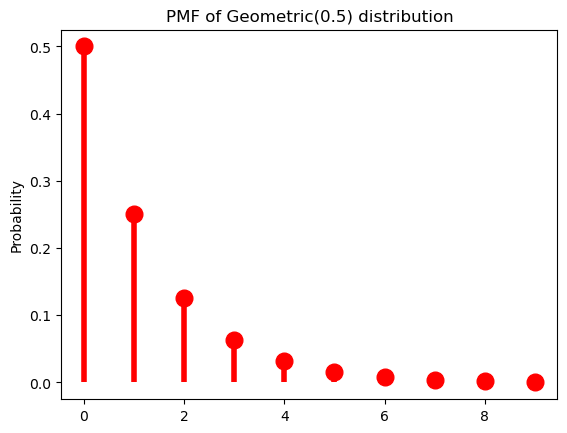

In [11]:
#| code-fold: true

p = 0.5

ax = subplot()
ax.plot(k, geom(p).pmf(k+1), 'ro', ms=12, mec='r')
ax.vlines(k, 0, geom(p).pmf(k+1), colors='r', lw=4)
ax.set_ylabel("Probability")
_ = ax.set_title(f"PMF of Geometric({p}) distribution")

As $\pi \rightarrow 0$, the distribution flattens out (or becomes *denser*). 

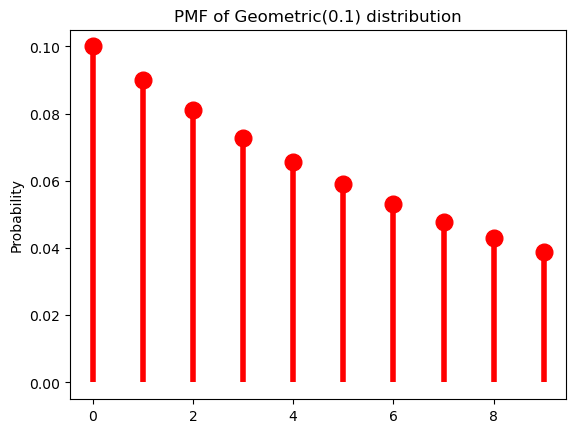

In [12]:
#| code-fold: true

p = 0.1

ax = subplot()
ax.plot(k, geom(p).pmf(k+1), 'ro', ms=12, mec='r')
ax.vlines(k, 0, geom(p).pmf(k+1), colors='r', lw=4)
ax.set_ylabel("Probability")
_ = ax.set_title(f"PMF of Geometric({p}) distribution")

And as $\pi \rightarrow 1$, it becomes sharper (or *sparser*).

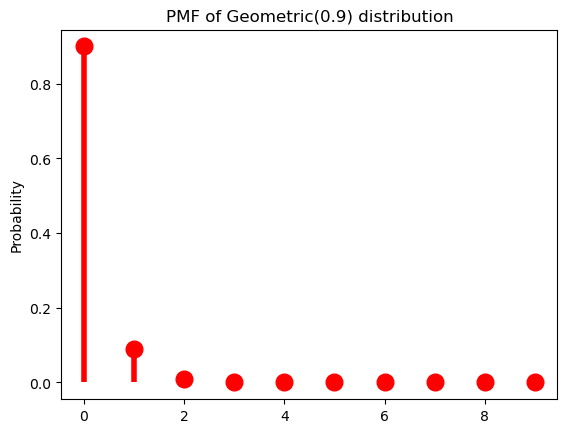

In [13]:
#| code-fold: true

p = 0.9

ax = subplot()
ax.plot(k, geom(p).pmf(k+1), 'ro', ms=12, mec='r')
ax.vlines(k, 0, geom(p).pmf(k+1), colors='r', lw=4)
ax.set_ylabel("Probability")
_ = ax.set_title(f"PMF of Geometric({p}) distribution")

At this point, it's useful to pause for a moment to think about what exactly a parameter like $\pi$ is. I said above that random variables and probability distributions together provide a way of classifying probability spaces: in saying that $p_X(k) = (1-\pi)^k\pi$ we are *describing* $\mathbb{P}: \mathcal{F} \rightarrow \mathbb{R}_+$ by using $X$ to abstract across whatever the underlying measurable space $\langle \Omega, \mathcal{F} \rangle$ is. The distribution gives you the form of that description; the parameter $\pi$ gives the content of the description. Because the use of $X$ is always implied, unless it really matters, I'm going to start dropping $X$ from $p_X$ unless I'm emphasizing the random variable in some way.

The $\pi$ parameter of a geometric distribution allows us to describe distributions that have a very particular shape–namely, ones where $\forall k \in \mathbb{N}: p(k) > p(k + 1)$. But this isn't always a good way of describing a particular distribution. For instance, for our string-length variable $L$, it's probably a pretty bad description regardless of what particular distribution on string lengths (type or token) we're describing because 1 grapheme/phoneme words just aren't more frequent than two grapheme/phoneme words. This point can be seen if we look at the distribution of word lengths at the type level in the [CMU Pronouncing Dictionary](http://www.speech.cs.cmu.edu/cgi-bin/cmudict), which contains phonemic transcriptions of English words.

In [14]:
from urllib.request import urlopen

cmudict_url = "http://svn.code.sf.net/p/cmusphinx/code/trunk/cmudict/cmudict-0.7b"

with urlopen(cmudict_url) as cmudict:
    words = [
        line.split()[1:] for line in cmudict if line[0] != 59
    ]

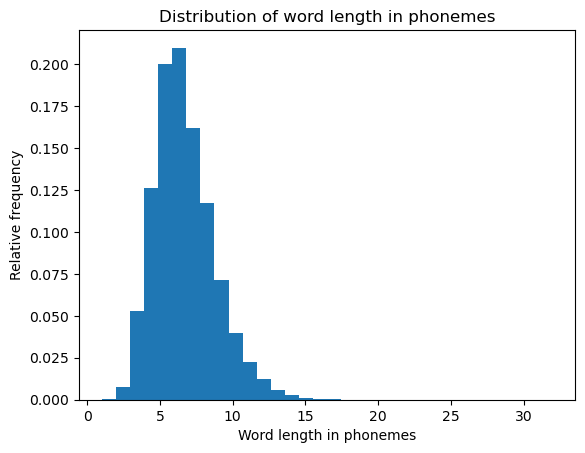

In [15]:
#| code-fold: true

ax = subplot()

ax.hist([len(w) for w in words], bins=32, density=True)

ax.set_title("Distribution of word length in phonemes")
ax.set_xlabel("Word length in phonemes")
_ = ax.set_ylabel("Relative frequency")

One such distribution that give us more flexibility in this respect is the [negative binomial distribution](https://en.wikipedia.org/wiki/Negative_binomial_distribution), which is a very useful for modeling token frequency in text [@church_poisson_1995]. This distribution effectively generalizes the geometric by allowing us to control the exponent on $\pi$ with a new parameter $r$.

$$\text{NegBin}(k; \pi, r) = {k+r-1 \choose r-1}(1-\pi)^{k}\pi^{r}$$

In [16]:
from scipy.stats import nbinom

This added flexibility in turn requires us to add an additional term ${k+r-1 \choose r-1} = \frac{(k+r-1)!}{(r-1)!\,(k)!}$ that ensures that the series $\sum_{k=0}^\infty \text{NegBin}(k; \pi, r)$ converges to $1$. The pieces of this term that do not include the value we're computing the probability of–i.e. $\frac{1}{(r-1)!}$–are often called the *normalizing constant*. We will make extensive use of this concept as the course moves forward.

When $r = 1$, we of course just get the geometric distribution. As such, if we keep $r = 1$, manipulating $\pi$ will have the same effect we saw above.

In [17]:
p = 0.5
r = 1

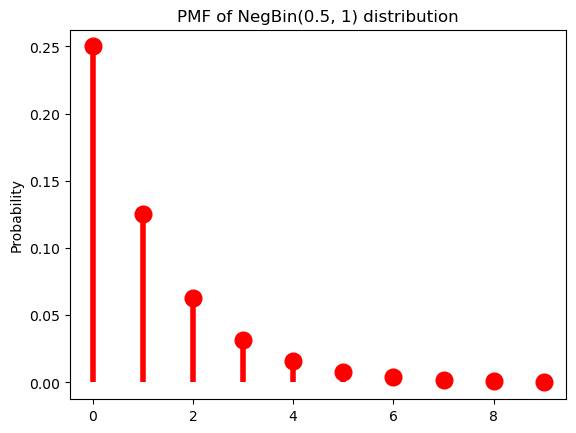

In [18]:
#| code-fold: true

ax = subplot()
ax.plot(k, nbinom(r, p).pmf(k+1), 'ro', ms=12, mec='r')
ax.vlines(k, 0, nbinom(r, p).pmf(k+1), colors='r', lw=4)
ax.set_ylabel("Probability")
_ = ax.set_title(f"PMF of NegBin({p}, {r}) distribution")

As $r$ grows, though, we get very different behavior: $p(k)$ is no longer always greater than $p(k + 1)$. Another way of saying this is that we can use $r$ to shift the probability mass rightward.

In [19]:
p = 0.5
r = 5

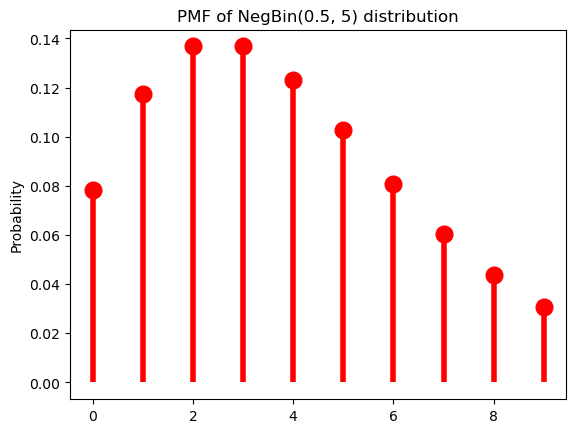

In [20]:
#| code-fold: true

ax = subplot()
ax.plot(k, nbinom(r, p).pmf(k+1), 'ro', ms=12, mec='r')
ax.vlines(k, 0, nbinom(r, p).pmf(k+1), colors='r', lw=4)
ax.set_ylabel("Probability")
_ = ax.set_title(f"PMF of NegBin({p}, {r}) distribution")

The mass-shifting effect is modulated by $\pi$: it accelerates with small $\pi$...

In [21]:
p = 0.1
r = 5

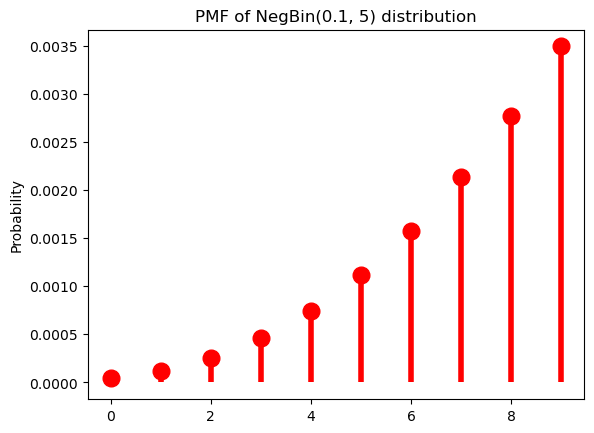

In [22]:
#| code-fold: true

ax = subplot()
ax.plot(k, nbinom(r, p).pmf(k+1), 'ro', ms=12, mec='r')
ax.vlines(k, 0, nbinom(r, p).pmf(k+1), colors='r', lw=4)
ax.set_ylabel("Probability")
_ = ax.set_title(f"PMF of NegBin({p}, {r}) distribution")

...but decelerates with large $\pi$. 

In [23]:
p = 0.9
r = 5

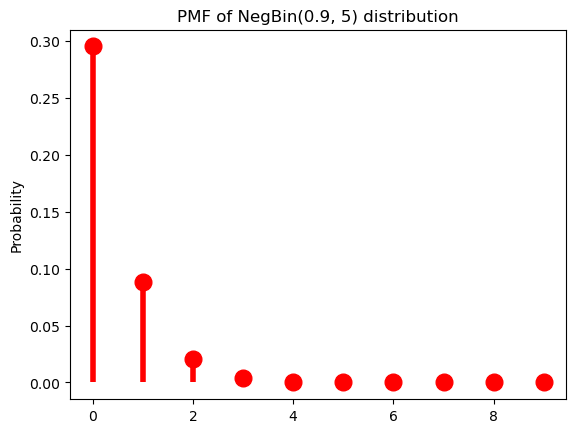

In [24]:
#| code-fold: true

ax = subplot()
ax.plot(k, nbinom(r, p).pmf(k+1), 'ro', ms=12, mec='r')
ax.vlines(k, 0, nbinom(r, p).pmf(k+1), colors='r', lw=4)
ax.set_ylabel("Probability")
_ = ax.set_title(f"PMF of NegBin({p}, {r}) distribution")

In [25]:
p = 0.9
r = 40

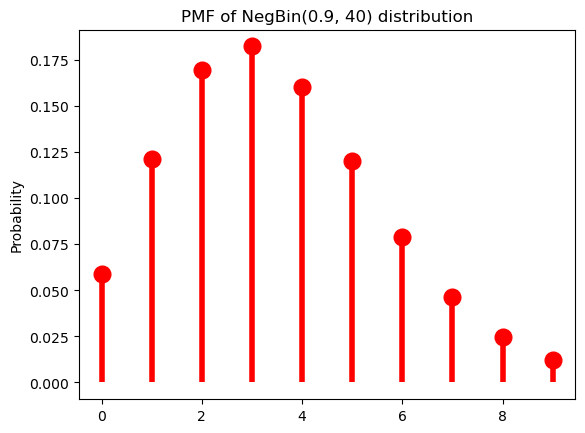

In [26]:
#| code-fold: true

ax = subplot()
ax.plot(k, nbinom(r, p).pmf(k+1), 'ro', ms=12, mec='r')
ax.vlines(k, 0, nbinom(r, p).pmf(k+1), colors='r', lw=4)
ax.set_ylabel("Probability")
_ = ax.set_title(f"PMF of NegBin({p}, {r}) distribution")

We won't talk about how to fit a distribution to some data until later, when we talk about parameter estimation; but the negative binomial distribution can provide a reasonably good description of the [empirical distribution](https://en.wikipedia.org/wiki/Empirical_distribution_function) of word lengths. One way to visualize this is to compare the empirical CDF with the CDF of the best fitting negative binomial.

In [27]:
from numpy import ones, exp, round, mgrid

from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.discrete.discrete_model import NegativeBinomial

ecdf = ECDF([len(w) for w in words])
negbin_fit = NegativeBinomial([len(w) for w in words], ones(len(words))).fit()

p = 1/exp(1+negbin_fit.params[0]*negbin_fit.params[1])
r = exp(negbin_fit.params[0])*p/(1-p)

print(f"p = {round(p, 2)}, r = {round(r, 2)}")

Optimization terminated successfully.
         Current function value: 2.180477
         Iterations: 22
         Function evaluations: 24
         Gradient evaluations: 24
p = 0.37, r = 3.71


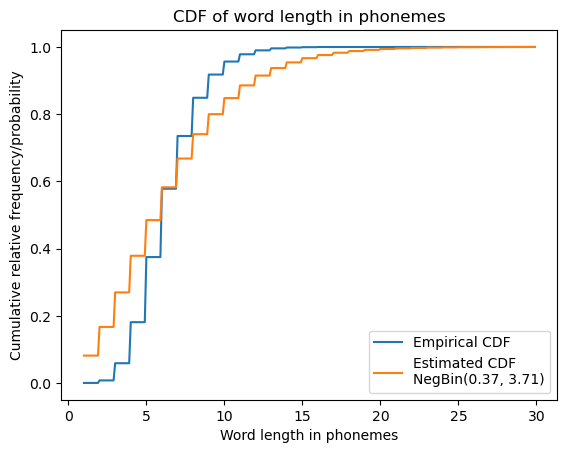

In [28]:
#| code-fold: true

k = arange(30)

ax = subplot()
ax.plot(mgrid[1:30:0.1], ecdf(mgrid[1:30:0.1]), label="Empirical CDF")
ax.plot(mgrid[1:30:0.1], nbinom(r, p).cdf(mgrid[1:30:0.1]), label=f"Estimated CDF\nNegBin({round(p, 2)}, {round(r, 2)})")
ax.legend()
ax.set_title("CDF of word length in phonemes")
ax.set_xlabel("Word length in phonemes")
_ = ax.set_ylabel("Cumulative relative frequency/probability")

A [limiting case](https://en.wikipedia.org/wiki/Negative_binomial_distribution#Poisson_distribution) of the negative binomial distribution that you may be familiar with is the [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution).

$$\text{Pois}(k; \lambda) = \frac{\lambda^k\exp(-\lambda)}{k!}$$

The Poisson distribution arises as $\text{Pois}(k; \lambda) = \lim_{r \rightarrow \infty} \text{NegBin}
\left(k; r, \frac{\lambda}{r + \lambda}\right)$. 

### Continuous probability distributions

Once we move to working with random variables that have an uncountable number of values–as in the case of our formant value example above, where $X: \mathbb{R}_+^2 \rightarrow \mathbb{R}^2$ is the identity function–we can no longer assign a non-zero probability to every value that variable takes. The intuition for why this is is that there are just too many numbers (e.g. too many possible formant values); and if we assigned non-zero probability to more than countably many of them, we'd end up with a sum across those numbers that doesn't satisfy the assumption of $\sigma$-additivity.^[You'll need to take my word on this point if you haven't proved it before.]

This fact is why we require the event space for an uncountable sample space to be a Borel $\sigma$-algebra. Remember that a Borel $\sigma$-algebra for the reals will contain all the intervals we might want but not single real numbers. This assumption about the event space in turn means that we don't need to worry about assigning non-zero probability to uncountably many values: indeed, we will *always* assign exactly zero probability to any particular real. (Well. Most of the time.) To restate this: every possibility in a real-valued sample space has probability zero: $\forall x \in \Omega: \mathbb{P}(x) = 0$. This in turn means that a PMF isn't going to be useful here.

What we work with instead is a [probability density function](https://en.wikipedia.org/wiki/Probability_density_function) (PDF) $f_X: \Omega \rightarrow \mathbb{R}_+$. Note that the PMF, which I will usually denote $p$ or $p_X$, and the PDF, which I will usually denote $f$ or $f_X$, have the same function signature. It is important to note that they provide very different information: where the PMF tells you the probability of a particular possibility, the PDF does not, though it can be used to compute a probability: specifically, the probability of $X$ taking on a value in some set. So it can be used to tell you $\mathbb{P}(X \in A)$:

$$\mathbb{P}(X \in A) = \int_A f_X(x) \, \mathrm{d}x$$

When the codomain of $X$ is a single value (rather than a vector), we call the distribution univariate; otherwise, we call it multivariate. We can express univariate continuous distributions as:

$$\mathbb{P}(a < X < b) = \int_a^b f_X(x) \, \mathrm{d}x$$

This expressions is a special case of the first:

$$\mathbb{P}(a < X < b) = \mathbb{P}(X \in (a, b)) = \int_{(a, b)} f_X(x) \, \mathrm{d}x$$

We can in turn express the cumulative distribution function $F_X$ in a similar way, but without a lower bound:

$$F_X(b) = \mathbb{P}(X < b) = \int_{-\infty}^b f_X(x) \, \mathrm{d}x$$

It can sometimes be useful to express $\mathbb{P}(a < X < b)$ and $\mathbb{P}(X > x)$ in terms of $F_X$:

$$\mathbb{P}(a < X < b) = F_X(b) - F_X(a)$$
$$\mathbb{P}(X > x) = 1 - F_X(x)$$

#### Univariate continuous uniform distribution

The simplest example of a continuous distribution is the univariate uniform distribution, which is parameterized by an infimum $a$ and a supremum $b$ and has a PDF:

$$\mathcal{U}(x; a, b) = \begin{cases}\frac{1}{b - a} & \text{if } x \in [a, b] \\ 0 & \text{otherwise}\end{cases}$$

In [29]:
from scipy.stats import uniform

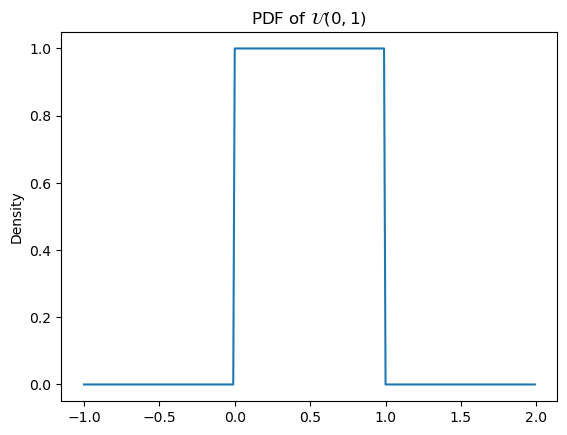

In [30]:
#| code-fold: true

u = uniform(0, 1)

ax = subplot()

ax.plot(
    mgrid[-1:2:0.01], 
    u.pdf(mgrid[-1:2:0.01])
)
ax.set_title(r"PDF of $\mathcal{U}(0, 1)$")
_ = ax.set_ylabel("Density")

You'll note that I'm using $\mathcal{U}$–rather than something like $\text{Unif}$–for the name of the PDF. Certain distributions, including the continuous uniform and the normal or gaussian, canonically have such names.

You'll also note that $\mathcal{U}(x; a, b)$ is the PDF, not the PMF. This notational convention is common: for discrete distributions like the negative binomial $\text{NegBin}$ will be used to denote the PMF (or to express that a random variable has a particular distribution), while for continuous distributions like the continuous uniform, $\mathcal{U}$ will be used to denote the PDF (or to express that a random variable has a particular distribution). 

Remember that **the PDF does not give you the probability of a value**: the probability of a (continuous) uniformly distributed value $x$ is not $\frac{1}{b - a}$, it is $0$; $\frac{1}{b - a}$ is the value of the density at $x$. This means that:

$$\mathbb{P}(x < X < y) = \int_x^y f_X(z)\,\mathrm{d}z = \frac{\min(y, b) - \max(x, a)}{b - a}$$

where $a = \inf \{x \in X(\Omega) \mid f_X(x) > 0\}$ and $b = \sup \{x \in X(\Omega) \mid f_X(x) > 0\}$. So then, if $a=0$ and $b=1$, $\mathbb{P}(0.25 < X < 0.75) = 0.5$. This can be visualized by filling in the area we're integrating.

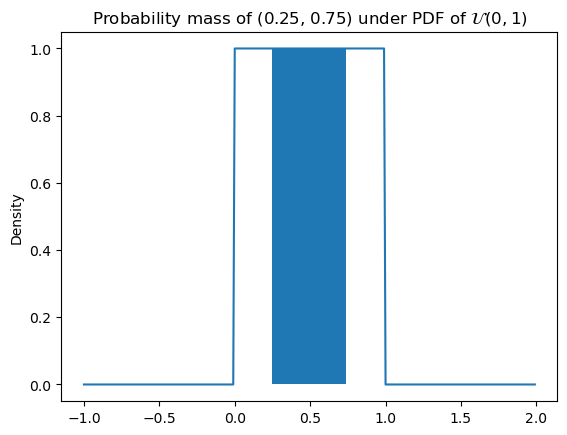

In [31]:
#| code-fold: true

ax = subplot()

ax.plot(
    mgrid[-1:2:0.01], 
    u.pdf(mgrid[-1:2:0.01])
)
_ = ax.fill_between(
    mgrid[0.25:0.75:0.01], 
    u.pdf(mgrid[0.25:0.75:0.01])
)
ax.set_title(r"Probability mass of (0.25, 0.75) under PDF of $\mathcal{U}(0, 1)$")
_ = ax.set_ylabel("Density")



Rather than define parameters relative to $X$ every time we want to specify a probability, I'll often write:

$$\mathbb{P}(x < X < y; a, b) = \int_x^y f_X(z)\,\mathrm{d}z = \frac{\min(y, b) - \max(x, a)}{b - a}$$

Or:

$$\mathbb{P}(x < X < y \mid a, b) = \int_x^y f_X(z)\,\mathrm{d}z = \frac{\min(y, b) - \max(x, a)}{b - a}$$

Whether I use the semicolon or pipe will depend on context, as we'll discuss below: it basically comes down to whether I'm assuming that $a$ and $b$ are the values of some underlying random variables–in which case, $\mathbb{P}(x < X < y \mid a, b)$ is really shorthand for something like $\mathbb{P}(x < X < y \mid A=a, B=b)$–or whether they're fixed values given by some oracle.

The CDF $F_X$ for a uniform random variable $X$ is then:

$$F_X(x) = \mathbb{P}(X < x; a, b) = \int_{-\infty}^x f_X(z)\,\mathrm{d}z = \frac{\min(\max(x, a), b) - a}{b - a}$$

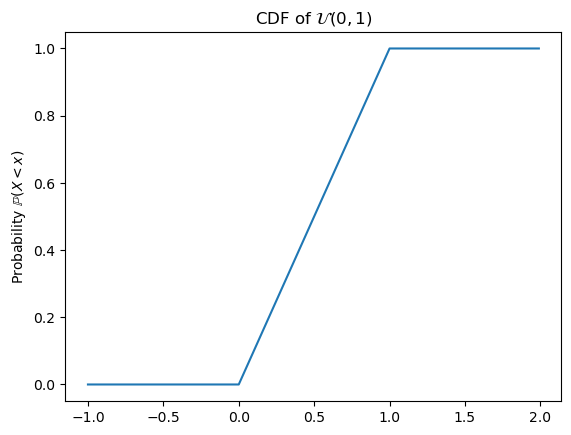

In [32]:
#| code-fold: true

ax = subplot()

ax.plot(
    mgrid[-1:2:0.01], 
    uniform(0, 1).cdf(mgrid[-1:2:0.01])
)

ax.set_title(r"CDF of $\mathcal{U}(0, 1)$")
_ = ax.set_ylabel(r"Probability $\mathbb{P}(X < x)$")

#### Beta distribution

Like the geometric distribution, the continuous uniform distribution doesn't give us all the control we might want over the shape of the distribution. We can gain that additional control using a Beta distribution.

$$\text{Beta}(x; \alpha, \beta) = \begin{cases}\frac{x^{\alpha-1}(1-x)^{\beta-1}} {\mathrm{B}(\alpha,\beta)} & \text{if } x \in (0, 1)\\0 & \text{otherwise}\end{cases}$$

where $\mathrm{B}(\alpha,\beta) = \frac {\Gamma (\alpha)\Gamma (\beta)}{\Gamma (\alpha+\beta)}$, the normalizing constant, is known as the [beta function](https://en.wikipedia.org/wiki/Beta_function) and $\Gamma$ (the [gamma function](https://en.wikipedia.org/wiki/Gamma_function)) generalizes the factorial function to real numbers: $\Gamma(x+1) = x\Gamma(x) = x!$ for all positive natural numbers; and more generally, for positive really numbers $\Gamma(x) = \int_0^\infty t^{x-1} e^{-t}\,\mathrm{d}t$.

In [33]:
from scipy.stats import beta

The beta distribution can be thought of as a generalization of the uniform distribution $\mathcal{U}(0, 1)$, since it is equivalent when $\alpha = \beta = 1$.

In [34]:
a = 1
b = 1

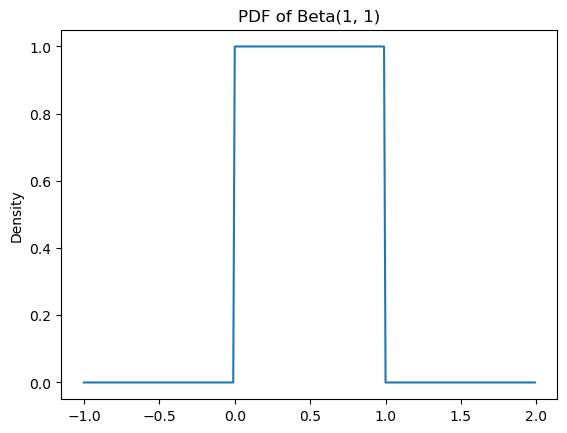

In [35]:
#| code-fold: true

ax = subplot()

ax.plot(
    mgrid[-1:2:0.01], 
    beta(a, b).pdf(mgrid[-1:2:0.01])
)

ax.set_title(f"PDF of Beta({a}, {b})")
_ = ax.set_ylabel("Density")

Defined this way, the beta distribution has support on (assigns non-zero values) only intervals in $(0, 1)$, but if we ever need support over an arbitrary finite interval $(a, b)$, we can simply add the bounds $a$ and $b$ to the parameterization.

$$\text{Beta}(x; \alpha, \beta, a, b) = \begin{cases}\frac{\left(\frac{x - a}{b - a}\right)^{\alpha-1}\left(1-\frac{x - a}{b - a}\right)^{\beta-1}} {\mathrm{B}(\alpha,\beta)} & \text{if } x \in (a, b)\\0 & \text{otherwise}\end{cases}$$

This definition makes the beta distribution a true generalization of $\mathcal{U}(a, b) = \text{Beta}(1, 1, a, b)$. We'll mainly work with the two-parameter version for the sake of simplicity, and because for most use cases, we actually only need support on $(0, 1)$.

Manipulating the *shape* parameters $\alpha$ and $\beta$ introduces bias toward $0$, $1$, or $\frac{\alpha}{\alpha + \beta}$. When $\alpha = \beta > 1$, we get more and more density closer to $\frac{\alpha}{\alpha + \beta} = 0.5$. We say that these distributions are *symmetric* (and *dense*, for reasons I will discuss in a second).

In [36]:
dense_symmetric_beta_params = [
    (3, 3),
    (5, 5),
    (10, 10)
]

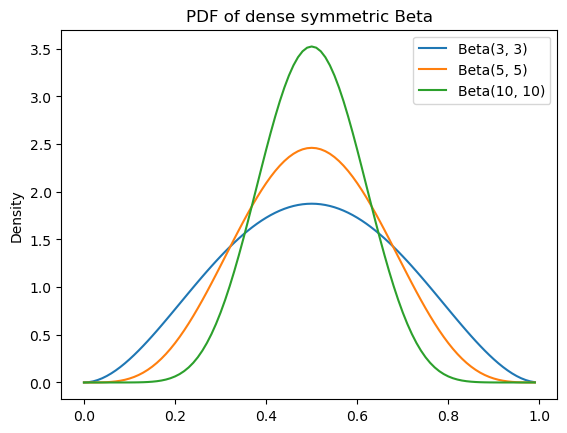

In [37]:
#| code-fold: true

ax = subplot()

for a, b in dense_symmetric_beta_params:
    ax.plot(
        mgrid[0:1:0.01], 
        beta(a, b).pdf(mgrid[0:1:0.01]),
        label=f"Beta({a}, {b})"
    )

ax.legend()
ax.set_title(r"PDF of dense symmetric Beta")
_ = ax.set_ylabel("Density")

If we increase $\alpha$ relative to $\beta > 1$, we shift this density to the right; and if we increase $\beta$ relative to $\alpha > 1$, we shift the density toward the left. We say that these are *asymmetric*.

In [38]:
dense_asymmetric_beta_params = [
    (5, 3),
    (3, 5)
]

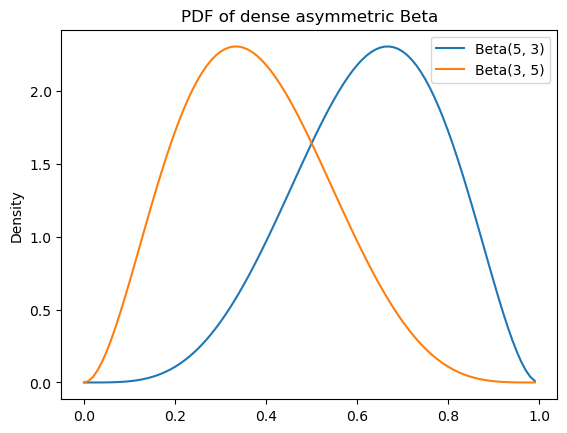

In [39]:
#| code-fold: true

ax = subplot()

for a, b in dense_asymmetric_beta_params:
    ax.plot(
        mgrid[0:1:0.01], 
        beta(a, b).pdf(mgrid[0:1:0.01]),
        label=f"Beta({a}, {b})"
    )

ax.legend()
ax.set_title(r"PDF of dense asymmetric Beta")
_ = ax.set_ylabel("Density")

In both cases, we have a bias against values nearer to $0$ and $1$ in proportion to how much greater than one the smaller of $\alpha$ and $\beta$ are.

When either $\alpha > 1 \geq \beta$ or $\alpha \leq 1 < \beta$, we get bias toward values nearer to $1$ or $0$, respectively. We say that these distributions are *sparse* (in contrast to *dense*), but like the other beta distributions we've seen–besides $\text{Beta}(1, 1)$–they are unimodal.

In [40]:
sparse_unimodal_beta_params = [
    (5, 1),
    (1, 5)
]

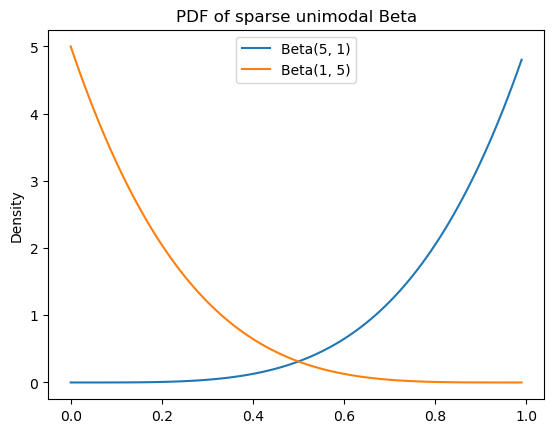

In [43]:
#| code-fold: true

ax = subplot()

for a, b in sparse_unimodal_beta_params:
    ax.plot(
        mgrid[0:1:0.01], 
        beta(a, b).pdf(mgrid[0:1:0.01]),
        label=f"Beta({a}, {b})"
    )

ax.legend()
ax.set_title(r"PDF of sparse unimodal Beta")
_ = ax.set_ylabel("Density")

When $\alpha, \beta < 1$, we get a bias toward values near both $0$ and $1$ with more density shifted toward $1$ if $\alpha$ is larger and more density shifted toward $0$ if $\beta$ is larger. These distributions are sparse and *bimodal*.

In [44]:
sparse_bimodal_beta_params = [
    (0.5, 0.5),
    (0.6, 0.4),
    (0.4, 0.6),
]

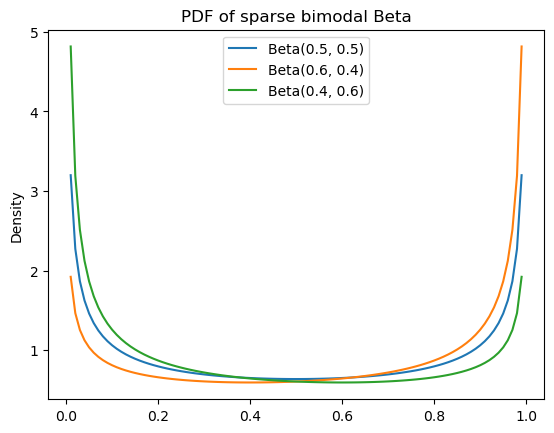

In [45]:
#| code-fold: true

ax = subplot()

for a, b in sparse_bimodal_beta_params:
    ax.plot(
        mgrid[0:1:0.01], 
        beta(a, b).pdf(mgrid[0:1:0.01]),
        label=f"Beta({a}, {b})"
    )

ax.legend()
ax.set_title(r"PDF of sparse bimodal Beta")
_ = ax.set_ylabel("Density")

#### Univariate Gaussian distribution

One continuous distribution we will work with extensively is the Gaussian or normal distribution.

$$\mathcal{N}(x; \mu, \sigma^2) = \frac{1}{\sigma\sqrt{2\pi}}\exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)$$

where $\mu$ is referred to as the *mean* and $\sigma^2$ as the *variance*.

In [46]:
from scipy.stats import norm

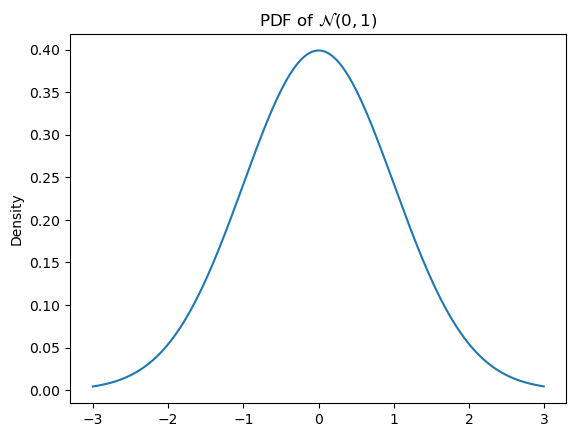

In [47]:
#| code-fold: true 

ax = subplot()

ax.plot(mgrid[-3:3:0.01], norm(0, 1).pdf(mgrid[-3:3:0.01]))

ax.set_title(r"PDF of $\mathcal{N}(0, 1)$")
_ = ax.set_ylabel("Density")

The mean controls the position and the variance controls the width–specifically, the wideness.



In [48]:
normal_params = [
    (0, 1),
    (1, 1),
    (0, 2)
]

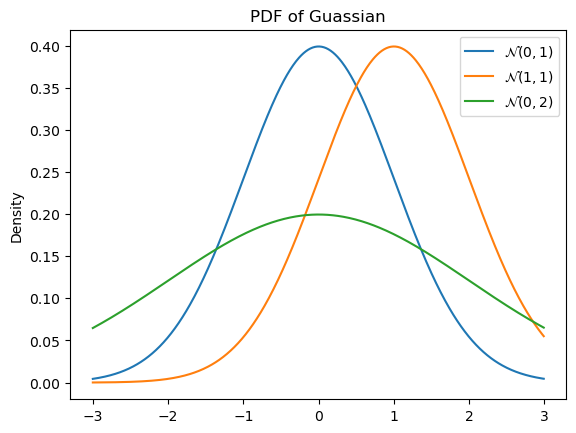

In [49]:
#| code-fold: true

ax = subplot()

for a, b in normal_params:
    ax.plot(
        mgrid[-3:3:0.01], 
        norm(a, b).pdf(mgrid[-3:3:0.01]),
        label=r"$\mathcal{N}("+str(a)+", "+str(b)+")$"
    )

ax.legend()
ax.set_title(r"PDF of Guassian")
_ = ax.set_ylabel("Density")



We say that the distribution is standard normal if the mean $\mu = 0$ and the variance $\sigma^2 = 1$.

As with all continuous distributions, we can compute the cumulative distribution function as:

$$\Phi(x) = \int_{-\infty}^x \mathcal{N}(y; \mu, \sigma^2)\,\mathrm{d}y$$

where $\Phi$ is a common notation for $F_X$, when $X$ is a Gaussian random variable.

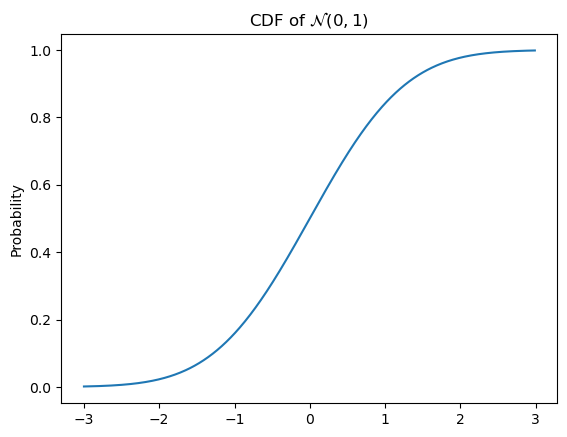

In [50]:
#| code-fold: true 

ax = subplot()

ax.plot(mgrid[-3:3:0.01], norm(0, 1).cdf(mgrid[-3:3:0.01]))

ax.set_title(r"CDF of $\mathcal{N}(0, 1)$")
_ = ax.set_ylabel("Probability")

$\Phi$ is often referred to as *sigmoidal* or a *sigmoid* for its S shape. These sorts of functions will be very important moving forward–most proximally because they play a role in modeling judgments provided through instruments like Likert (1-7) scales and slider scales.

The Gaussian CDF is only one of many continuous CDFs with this shape. The beta CDF is also sigmoidal when $\alpha, \beta \neq 1$.

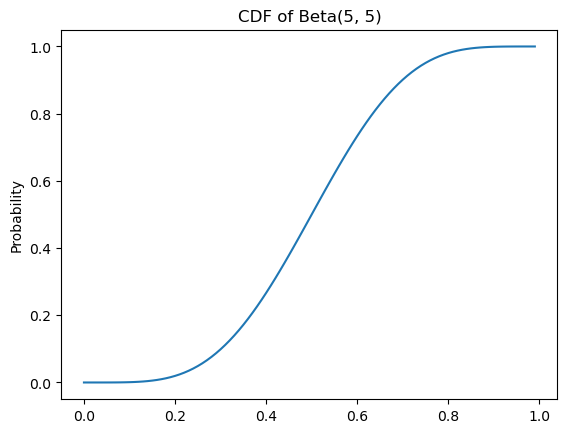

In [70]:
#| code-fold: true

ax = subplot()

ax.plot(mgrid[0:1:0.01], beta(5, 5).cdf(mgrid[0:1:0.01]))

ax.set_title(r"CDF of Beta(5, 5)")
_ = ax.set_ylabel("Probability")

## Some more useful definitions

Since random variables are required to preserve the structure of the event space, the definitions of joint probability, conditional probability, and independence can all be extended to them. The introduction of random variables and probability distributions also allows us to define a notion of [expected value](https://en.wikipedia.org/wiki/Expected_value).

### Joint probability

Defining the joint probability of random variables $X$ and $Y$ with underlying probabiliy spaces $\langle \Omega_X, \mathcal{F}_X, \mathbb{P}_X \rangle$ and $\langle \Omega_Y, \mathcal{F}_Y, \mathbb{P}_Y \rangle$ requires us to define a new probability space $\langle \Omega_X \times \Omega_Y, \mathcal{F}_{X, Y}, \mathbb{P}_{X, Y} \rangle$, where $\mathcal{F}_{X, Y}$ is the [product $\sigma$-algebra](https://en.wikipedia.org/wiki/%CE%A3-algebra#Product_%CF%83-algebra) $\sigma\left(\left\{E_X \times E_Y \mid E_X \in \mathcal{F}_X, E_Y \in \mathcal{F}_Y\right\}\right)$ on $\Omega_X \times \Omega_Y$. We then define the joint distribution $p_{X, Y}$ in terms of $X'(\omega_X, \omega_Y) = X(\omega_X)$ and $Y'(\omega_X, \omega_Y) = Y(\omega_Y)$:

$$\begin{align*}p_{X, Y}(x, y) &= \mathbb{P}_{X, Y}(X' = x, Y' = y)\\ &= \mathbb{P}_{X, Y}\left(\{\langle\omega_X, \omega_Y\rangle \mid X'(\langle\omega_X, \omega_Y\rangle) = x\}, \{\langle\omega_X, \omega_Y\rangle \mid Y'(\langle\omega_X, \omega_Y\rangle) = y\}\right)\\ &= \mathbb{P}_{X, Y}\left(\{\langle\omega_X, \omega_Y\rangle \mid X'(\langle\omega_X, \omega_Y\rangle) = x\} \cap \{\langle\omega_X, \omega_Y\rangle \mid Y'(\langle\omega_X, \omega_Y\rangle) = y\}\right)\\ &= \mathbb{P}_{X, Y}\left(\{\langle\omega_X, \omega_Y\rangle \mid X'(\langle\omega_X, \omega_Y\rangle) = x \land Y'(\langle\omega_X, \omega_Y\rangle) = y\}\right)\\ &= \mathbb{P}_{X, Y}\left(\{\langle\omega_X, \omega_Y\rangle \mid X(\omega_X) = x \land Y'(\omega_Y) = y\}\right)\end{align*}$$

where $p_{X, Y}$ (and thus $\mathbb{P}_{X, Y}$) must be such that the *marginal distributions* $p_X$ and $p_Y$ satisfy:

$$p_X(x) = \begin{cases}\sum_{y \in Y(\Omega_Y)} p_{X, Y}(x, y) & \text{if $Y$ is discrete} \\ \int_{Y(\Omega_Y)} p_{X, Y}(x, y)\,\mathrm{d}y & \text{if $Y$ is continuous} \\ \end{cases}$$

$$p_Y(y) = \begin{cases}\sum_{x \in X(\Omega_X)} p_{X, Y}(x, y) & \text{if $X$ is discrete} \\ \int_{X(\Omega_X)} p_{X, Y}(x, y)\,\mathrm{d}x & \text{if $X$ is continuous} \\ \end{cases}$$

I'll sometimes simply write $p(x, y)$ (with $x$ and $y$ values of implicit random variables) instead of $p_{X, Y}(x, y)$. I'll often use $p$ here, even when both $X$ and $Y$ are continuous. I'll also often drop all but the variable of summation/integration from the sum or integral over the range of a random variable. So I'll write things like...

$$p(x) = \begin{cases}\sum_{y} p(x, y) & \text{if $Y$ is discrete} \\ \int p(x, y)\,\mathrm{d}y & \text{if $Y$ is continuous} \\ \end{cases}$$

...rather than...

$$p_X(x) = \begin{cases}\sum_{y \in Y(\Omega_Y)} p_{X, Y}(x, y) & \text{if $Y$ is discrete} \\ \int_{Y(\Omega_Y)} p_{X, Y}(x, y)\,\mathrm{d}y & \text{if $Y$ is continuous} \\ \end{cases}$$

Just remember that $p_{X, Y}$ is a different function from $p_X$ or $p_Y$–even when I write $p(x, y)$, $p(x)$, or $p(y)$, rather than the more verbose $p_{X, Y}(x, y)$, $p_X(x)$, or $p_Y(y)$.

### Conditional probability

The conditional probability of a random variable $X$ given a random variable $Y$ is defined in terms of their joint probability and the marginal probability of $Y$:

$$p_{X \mid Y}(x \mid y) \equiv \frac{p_{X, Y}(x, y)}{p_{Y}(y)} = \begin{cases}\frac{p_{X, Y}(x, y)}{\sum_{x'} p_{X, Y}(x', y)} & \text{if $X$ is discrete} \\ \frac{p_{X, Y}(x, y)}{\int p_{X, Y}(x', y)\,\mathrm{d}x'} & \text{if $X$ is continuous} \\ \end{cases}$$

### Independence

We can extend the definition of independent events to that of independent random variables by saying that two random variables $X$ and $Y$ are independent if and only if:

$$p_{X \mid Y}(x \mid y) = p_X(x)$$
$$p_{Y \mid X}(y \mid x) = p_Y(y)$$

By the same reasoning as for independent events, this in turn implies that:

$$p_{X, Y}(x, y) = p_X(x)p_Y(y)$$

We say that two random variables $X$ and $Y$ are conditionally independent given another $Z$ if and only if:

$$p_{X \mid Y, Z}(x \mid y, z) = p_{X \mid Z}(x \mid z)$$
$$p_{Y \mid X, Z}(y \mid x, z) = p_{Y \mid Z}(y \mid z)$$

As before, this implies that:

$$p_{X, Y \mid Z}(x, y \mid z) = p_{X \mid Z}(x \mid z)p_{Y \mid Z}(y \mid z)$$

Note that being conditionally independent is not the same as being independent.

### Expected values

The *expected value* $\mathbb{E}[X]$ of a random variable $X$ can be thought of as a kind of weighted average over the values of that variable. When the variable is discrete, this average is computed using a sum.

$$\mathbb{E}[X] \equiv \sum_{x} x \cdot p_X(x)$$

When the variable is continuous, this average is computed using an integral.

$$\mathbb{E}[X] \equiv \int x \cdot f_X(x) \, \mathrm{d}x$$

The expected value of a random variable $X$ is often referred to as the *mean of* $X$. Given a PMF or PDF of a probability distribution, we can often (though not always) compute the mean analytically in terms of the distribution's parameters. For instance, the mean of a random variable $X \sim \text{Geom}(\pi)$ is:

$$\mathbb{E}[X] = \sum_{k=0}^\infty k \cdot (1-\pi)^k\pi = \frac{1-\pi}{\pi}$$

And the mean of a random variable $X \sim \text{Beta}(\alpha, \beta)$ is:

$$\mathbb{E}[X] = \int_0^1 x \cdot \frac{x^{\alpha - 1}(1-x)^{\beta-1}}{\text{B}(\alpha, \beta)} \, \mathrm{d}x = \frac{\alpha}{\alpha + \beta}$$

The mean of a [Cauchy-distributed random variable](https://en.wikipedia.org/wiki/Cauchy_distribution) $X \sim \text{Cauchy}(x_0, \gamma)$ is one instance of a random variable where $\mathbb{E}[X]$ is not defined. This fact is not immediately obvious from its PDF.

$$\text{Cauchy}(x; x_{0},\gamma )={\frac {1}{\pi \gamma \left[1+\left({\frac {x-x_{0}}{\gamma }}\right)^{2}\right]}}$$

In [ ]:
from scipy.stats import cauchy

_ = plt.plot(mgrid[-3:3:0.01], cauchy(0, 1).pdf(mgrid[-3:3:0.01]))

The moral is to be careful in assuming that the expected value is always defined.

#### Expected value of a function of a random variable

We'll often have cause to take the expected value of some function $g(X) \equiv g \circ X$ of a random variable, which we define as:

$$\mathbb{E}\left[g(X)\right] \equiv \begin{cases}\sum_{x} g(x) \cdot p(x) & \text{if $X$ is discrete} \\ \int g(x) \cdot f(x) \, \mathrm{d}x & \text{if $X$ is continuous} \\ \end{cases}$$

For simple [affine functions](https://en.wikipedia.org/wiki/Affine_transformation), it is straightforward to prove that $\mathbb{E}\left[aX + b\right] = a\mathbb{E}\left[X\right] + b$. But it's important to note that $\mathbb{E}\left[g(X)\right] \neq g\left(\mathbb{E}\left[X\right]\right)$ in general.^[If $g$ is [convex](https://en.wikipedia.org/wiki/Convex_function), however, $\mathbb{E}\left[g(X)\right] \geq g\left(\mathbb{E}\left[X\right]\right)$ by [Jensen's inequality](https://en.wikipedia.org/wiki/Jensen%27s_inequality).]

#### Central moments

One function of a random variable we'll use frequently is $\left(X - \mathbb{E}[X]\right)^k$, which gives us the concept of a [central moment](https://en.wikipedia.org/wiki/Central_moment):

$$\mathbb{E}\left[\left(X - \mathbb{E}[X]\right)^k\right] = \begin{cases}\sum_{x \in X(\Omega)} \left(x - \mathbb{E}[X]\right)^k \cdot p_X(x) & \text{if $X$ is discrete} \\ \int_{X(\Omega)} \left(x - \mathbb{E}[X]\right)^k \cdot f_X(x) \, \mathrm{d}x & \text{if $X$ is continuous} \\ \end{cases}$$

The second central moment $\mathbb{E}\left[\left(X - \mathbb{E}[X]\right)^2\right]$ is known as the [variance](https://en.wikipedia.org/wiki/Variance) $\mathbb{V}\left[X\right]$ or $\text{Var}[X]$, which is a common measure of [dispersion](https://en.wikipedia.org/wiki/Statistical_dispersion). Another common measure of dispersion, the standard deviation, is simply $\sqrt{\mathbb{V}[X]}$. 

Like the expected value/mean, the variance of a particular distribution can often be computed analytically in terms of the distribution's parameters. For instance, the variance of a random variable $X \sim \text{Geom}(\pi)$ is:

$$\mathbb{V}[X] \equiv \sum_{k=0}^\infty (k - \mathbb{E}[X])^2 \cdot (1-\pi)^k\pi$$

If $X \sim \mathcal{N}(\mu, \sigma^2)$ , then $\mathbb{E}[X] = \mu$ and $\mathbb{V}[X] = \sigma^2$, hence the names *mean* and *variance* for those parameters.

#### Covariance and correlation

It is often useful to know how two random variables $X$ and $Y$ "move together" or *covary*. We can measure this *covariance* by extending variance $\mathbb{V}[X]$, which is a property of a single random variable, to covariance, which is a property of pairs of random variables with a joint distribution $p_{X, Y}$. Assuming both $X$ and $Y$ are continuous and real-valued:

$$\begin{align*}\text{cov}(X, Y) &= \mathbb{E}[(X - \mathbb{E}[X])(Y - \mathbb{E}[Y])]\\ &= \int_{\mathbb{R}^2} (x - \mathbb{E}[X]) \cdot (y - \mathbb{E}[Y]) \cdot p(x, y) \, \mathrm{d}\langle x, y \rangle \\ &= \int_{\mathbb{R}} \left[\int_{\mathbb{R}} (x - \mathbb{E}[X]) \cdot (y - \mathbb{E}[Y]) \cdot p(x, y) \, \mathrm{d}x\right]\, \mathrm{d}y\end{align*}$$

If either are discrete, we just replace the integral over that variable with a sum.

The covariance of a random variable with itself is just the variance: 

$$\text{cov}(X, X) \equiv \mathbb{E}[(X - \mathbb{E}[X])(X - \mathbb{E}[X])] = \mathbb{V}[X]$$

The covariance has units corresponding to whatever the units of $X$ and $Y$ are: for instance, if both were formant values, the units would be frequency. The (Pearson) correlation normalizes these units away to a quantity in $[-1, 1]$, which can be useful if the variables have different units whose product is not itself interpretable.

$$\text{corr}(X, Y) \equiv \frac{\text{cov}(X, Y)}{\sqrt{\mathbb{V}[X]}\sqrt{\mathbb{V}[Y]}}$$

This quantity is guaranteed to be between $[-1, 1]$ due to an application of the [Cauchy-Schwarz inequality](https://en.wikipedia.org/wiki/Cauchy%E2%80%93Schwarz_inequality#Probability_theory):

$$\text{cov}(X, Y)^2 \leq \mathbb{V}[X] \cdot \mathbb{V}[Y]$$

#### Conditional expectation

In certain cases, we need the expected value of one random variable $X$ conditioned on another random variable $Y$: $\mathbb{E}[X \mid Y]$. In the case where we known the value of $Y$ (or want to assume we do): 

$$\mathbb{E}[X \mid Y = y] = \begin{cases}\sum_x x \cdot p(x \mid y) & \text{if } X \text{ is discrete} \\ \int x \cdot p(x \mid y) \, \mathrm{d}x & \text{if } X \text{ is continuous}\end{cases}$$

Thus, we could think of $\mathbb{E}[X \mid Y = y]$ as a function $g: \mathrm{cod}(Y) \rightarrow \mathrm{cod}(X)$.

Alternatively, we can think of $\mathbb{E}[X \mid Y]$ as a random variable $g(Y) = g \circ Y: \mathrm{dom}(Y) \rightarrow \mathrm{cod}(X)$, where $\mathrm{dom}(Y)$ is the sample space of the probability space underlying $Y$.